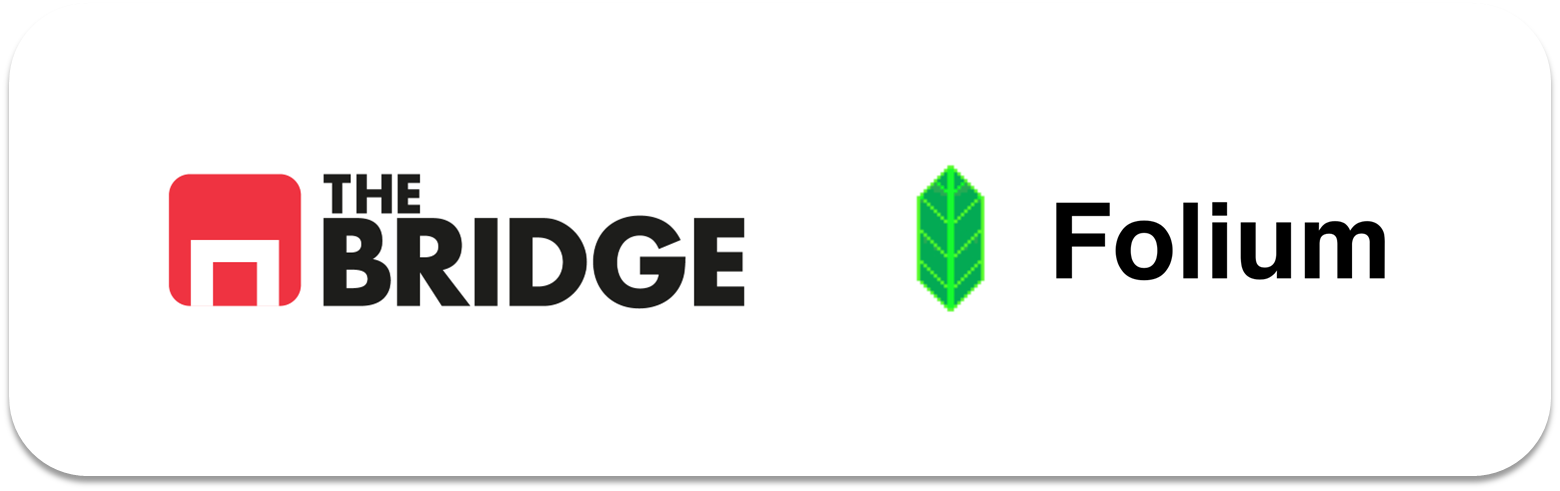

# Python Interactive Maps with Folium (Extended Tutorial)

# Notes

* folium is similar to ipyleaflet but different in some functionaly and syntax
* for install instructions go to python.org, python package index, search for folium

# Data Files

* indiana_outline_map.geojson
* sales_region1.geojson
* sales_region2.geojson
* sales_region3.geojson
* geojson_indianacounties.geojson
* indiana_population_by_county.csv
* flags_of_africa.png (from Wikipedia)

# Documentation

In [ ]:
from IPython.display import IFrame
documentation = IFrame(src='https://python-visualization.github.io/folium/', width=1000, height=500)
display(documentation)

# Imports

In [ ]:
import folium # pip install folium
from folium import plugins
import ipywidgets
import geocoder # pip install geocoder
import numpy as np
import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets

# Basic Maps

In [ ]:
folium.Map?

In [ ]:
folium.Map()

In [ ]:
map1 = folium.Map(location=[40.4567, -3.6840],
                 zoom_start=14,
                #  width=700,
                #  height=500,
                 control_scale=True)
map1

In [ ]:
# another way to change map size

from branca.element import Figure

fig = Figure(width=700, height=500)
fig.add_child(map1)
fig

# Save Map

In [ ]:
map1.save('map1.html')

# Map Types

In [ ]:
# widget
select_widget=ipywidgets.Select(
    options=['Open Street Map', 'Terrain', 'Toner', 'Watercolor', 'Positron', 'Dark Matter'],
    value='Open Street Map',
    description='Map Type:',
    disabled=False)

# widget function
def select(map_type):
    if map_type == 'Open Street Map':
        display(folium.Map(location=[40.416719, -3.684016], zoom_start=12, height=500))
    if map_type == 'Terrain':
        display(folium.Map(location=[40.416719, -3.684016], tiles='Stamen Terrain', zoom_start=12, height=400))
    if map_type == 'Toner':
        display(folium.Map(location=[40.416719, -3.684016], tiles='Stamen Toner', zoom_start=12, height=400))
    if map_type == 'Watercolor':
        display(folium.Map(location=[40.416719, -3.684016], tiles='Stamen Watercolor', zoom_start=12, height=400))
    if map_type == 'Positron':
        display(folium.Map(location=[40.416719, -3.684016], tiles='CartoDB Positron', zoom_start=12, height=400))
    if map_type == 'Dark Matter':
        display(folium.Map(location=[40.416719, -3.684016], tiles='CartoDB Dark_Matter', zoom_start=12, height=400))
        
# interaction between widgets and function    
ipywidgets.interact(select, map_type=select_widget);

In [ ]:
# show map types using layer control
# Layers: https://deparkes.co.uk/2016/06/10/folium-map-tiles/

# map
map_layer_control = folium.Map(location=[40.416719, -3.684016], zoom_start=12)

# add tiles to map
folium.raster_layers.TileLayer('Open Street Map').add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Toner').add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(map_layer_control)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(map_layer_control)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(map_layer_control)

# add layer control to show different maps
folium.LayerControl().add_to(map_layer_control)

# display map
map_layer_control

In [ ]:
map_with_mini = folium.Map(location=[40.416719, -3.684016], zoom_start=7)

minimap = plugins.MiniMap(toggle_display = True)

map_with_mini.add_child(minimap)

plugins.Fullscreen(position = 'topright').add_to(map_with_mini)
map_with_mini.save('map_with_mini.html')
map_with_mini

# Markers

In [ ]:
folium.Marker?

In [ ]:
# address_latlng

In [ ]:
# geocode address and place marker on map



# get location information for address.
# place = 'Zaragoza'
# address = geocoder.osm(place)
# address = geocoder.osm('Madrid, Calle Juan de Mena, 14')
# place = 'Madrid, Hospital Ramon y Cajal'
place = 'Madrid, Museo del Prado'
# place = 'Sevilla, Expo 92'
address = geocoder.osm(place)

# address = geocoder.osm('Madrid, The Bridge')
# address latitude and longitude
address_latlng = [address.lat, address.lng]

# map
map_madrid = folium.Map(location=[address.lat, address.lng], zoom_start=12)

# add marker to map
folium.Marker(address_latlng,
             popup = place,
             tooltip = 'click').add_to(map_madrid)

# display map
display(map_madrid)

In [ ]:
# airports dataframe using vega_datasets
airports = vds.airports()
airports = airports[:25]
airports.head()

In [ ]:
# multiple markers using dataframe
# there is an example below using apply function instead of loop

# create map
map_airports = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations
for (index, row) in airports.iterrows():
    folium.Marker(location = [row.loc['latitude'], row.loc['longitude']],
                 popup = row.loc['name'] + ' ' + row['city'],
                 tooltip = 'click').add_to(map_airports)

    
# display map    
map_airports

In [ ]:
# markers with apply function

# map
map_airports2 = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations using apply
airports.apply(lambda row: folium.Marker(location = [row['latitude'], row['longitude']], popup = row.loc['name'] + ' ' + row['city'],).add_to(map_airports2), axis=1)

# display map
map_airports2                                                

In [ ]:
markers_dict = {'Los Angeles': [34.041008, -118.246653], 
                'Las Vegas': [36.169726, -115.143996], 
                'Denver': [39.739448, -104.992450], 
                'Chicago': [41.878765, -87.643267], 
                'Manhattan': [40.782949, -73.969559]}

In [ ]:
for elemento in markers_dict.items():
    print(elemento)
    # print(elemento[0])
    # print(elemento[1])

In [ ]:
# multiple markers using dictionary

markers_dict = {'Los Angeles': [34.041008, -118.246653], 
                'Las Vegas': [36.169726, -115.143996], 
                'Denver': [39.739448, -104.992450], 
                'Chicago': [41.878765, -87.643267], 
                'Manhattan': [40.782949, -73.969559]}

# create map
map_cities = folium.Map(location=[41, -99], zoom_start=4)

# plot locations
for i in markers_dict.items():
    folium.Marker(location=i[1], popup=i[0]).add_to(map_cities)
    print(i)

# display map    
map_cities

# Custom Markers

In [ ]:
folium.Icon?

In [ ]:
# map
map_cm_fa = folium.Map(location=[38, -98], zoom_start=4)

'''
Iconos 'fa'
Iconos 'glyphicon'
'''
# add custom marker to map
folium.Marker(location=[38, -98], 
              popup='popup', 
              icon=folium.Icon(color='green', icon='bolt', prefix='fa')).add_to(map_cm_fa)

# display map
map_cm_fa

In [ ]:
# search for 'glyphicon bootstrap' icons to see examples

# map
map_cm_glyphicon = folium.Map(location=[38, -98], zoom_start=4)

# add custom marker to map
folium.Marker(location=[38, -98], 
              popup='popup', 
              icon=folium.Icon(icon='glyphicon-plane', prefix='glyphicon')).add_to(map_cm_glyphicon)

# display map
map_cm_glyphicon

In [ ]:
# multiple custom markers

# dataframe with custom marker names
cm_df = pd.DataFrame({'city': ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan'],
                      'latitude': [34.041008, 36.169726, 39.739448, 41.878765, 40.782949],
                      'longitude': [-118.246653, -115.143996, -104.992450, -87.643267, -73.969559],
                      'icon': ['bicycle', 'car', 'bus', 'truck', 'motorcycle']})
cm_df

In [ ]:
# map
map_cm_multiple = folium.Map(location=[38, -98], zoom_start=4)

# add markers to map
# for loop with itertuples (experiment that appears to work well)
# can also use iterrows or dataframe apply

for i in cm_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude], 
                  popup=i.city,
                  icon=folium.Icon(icon=i.icon, prefix='fa')).add_to(map_cm_multiple)

# display map    
map_cm_multiple

In [ ]:
# cm_enum_df.head()

In [ ]:
# enumerate markers

# data
cm_enum_df = pd.DataFrame({'city': ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan'],
                           'latitude': [34.041008, 36.169726, 39.739448, 41.878765, 40.782949],
                           'longitude': [-118.246653, -115.143996, -104.992450, -87.643267, -73.969559],
                           'icon_num': [1, 2, 3, 4, 5]})

# map
map_enum_icons = folium.Map([38, -98], zoom_start=4)

# icons using plugins.BeautifyIcon
for i in cm_enum_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude],
                  popup=i.city,
                  icon=plugins.BeautifyIcon(number=i.icon_num,
                                            border_color='blue',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(map_enum_icons)

# display map    
map_enum_icons

# Circle Markers

In [ ]:
# map
map_circle = folium.Map(location=[38, -98], zoom_start=4)

# radius of the circle in meters
folium.Circle(radius = 100000, location = [38, -98], color = 'green').add_to(map_circle)

# circle of a fixed size with radius specified in pixels
folium.CircleMarker(location=[39, -105], radius = 25, color = 'blue', fill_color = 'yellow').add_to(map_circle)

# display map
map_circle

# Plot Route

In [ ]:
# route

# map
map_plot_route = folium.Map(location=[38, -98], zoom_start=4)

# route_locs = ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan']
# can use list of lists or list of tuples
route_lats_longs = [[34.041008,-118.246653],
                    [36.169726,-115.143996], 
                    [39.739448,-104.992450], 
                    [41.878765,-87.643267], 
                    [40.782949,-73.969559]]

# add route to map
folium.PolyLine(route_lats_longs).add_to(map_plot_route)

# display map
map_plot_route

In [ ]:
# ant path route
# uses import - from folium import plugins

# map
map_ant_route = folium.Map(location=[38, -98], zoom_start=4)

# add ant path route to map
plugins.AntPath(route_lats_longs).add_to(map_ant_route)

# display map
map_ant_route

# Overlay GeoJSON Layers

In [ ]:
# use a link or file
# use geojson.io to create custom geojson files
# can also use folium Draw control to create geojson files (example below)
# convert shapefiles to geojson using QGIS

# map
map_geojson = folium.Map(location=[39.77, -86.15], zoom_start=7)

# add geojson file to map
folium.GeoJson('data/indiana_outline_map.geojson', name='geojson indiana').add_to(map_geojson)

# # add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_geojson)

# display map
map_geojson

# Subgroups with GeoJSON

In [ ]:
# map
map_with_subgroups = folium.Map(location=[39.77, -86.15], zoom_start=7)

# all subgroups
all_subgroups = folium.FeatureGroup(name='all sales regions')
map_with_subgroups.add_child(all_subgroups)

# subgroup 1
sales_region1 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 1')
map_with_subgroups.add_child(sales_region1)

# subgroup 2
sales_region2 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 2')
map_with_subgroups.add_child(sales_region2)

# subgroup 3
sales_region3 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 3')
map_with_subgroups.add_child(sales_region3)

# pull in geojson layers and add to map
folium.GeoJson('data/sales_region1.geojson').add_to(sales_region1)
folium.GeoJson('data/sales_region2.geojson').add_to(sales_region2)
folium.GeoJson('data/sales_region3.geojson').add_to(sales_region3)

# add layer control to map (allows layers to be turned on or off)
folium.LayerControl(collapsed=False).add_to(map_with_subgroups)

# display map
map_with_subgroups

# Choropleth Map

In [ ]:
folium.Choropleth?

In [ ]:
import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('geojson_indiana_counties.geojson') as f:
    geo_json_counties = json.load(f)
    
for i in geo_json_counties['features']:
    i['id'] = i['properties']['NAME_L']

In [ ]:
i

In [ ]:
geo_json_counties['features'][0]

In [ ]:
pop_df = pd.read_csv('data/indiana_population_by_county.csv')
pop_df[pop_df['County'] == 'Steuben']
pop_df

In [ ]:
# more examples for choropleth maps in the documentation

import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('data/geojson_indiana_counties.geojson') as f:
    geo_json_counties = json.load(f)
    
# add feature 'id' county name to geojson
# access features
for i in geo_json_counties['features']:
    i['id'] = i['properties']['NAME_L']
    
# load data associated with geo_json
pop_df = pd.read_csv('data/indiana_population_by_county.csv')

# map    
map_choropleth = folium.Map(location=[39.77, -86.15], zoom_start=7)

# choropleth
folium.Choropleth(
    geo_data=geo_json_counties,
    name='choropleth',
    data=pop_df,
    columns=['County', 'Population'],
    # see folium.Choropleth? for details on key_on
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_choropleth)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map_choropleth)

# display map
map_choropleth

# Heat Map

In [ ]:
# use import geocoder

# get location data for large cities (latitude and longitude)
new_york_city = geocoder.osm('New York City, New York')
los_angeles = geocoder.osm('Los Angeles, California')
chicago = geocoder.osm('Chicago, Illinois')
houston = geocoder.osm('Houston, Texas')
phoenix = geocoder.osm('Phoenix, Arizona')
philadelphia = geocoder.osm('Philadelphia, Pennsylvania')
san_antonio = geocoder.osm('San Antonio, Texas')
san_diego = geocoder.osm('San Diego, California')
dallas = geocoder.osm('Dallas, Texas')
san_jose = geocoder.osm('San Jose, California')

# create latitude, longitude, intensity for heat map
# intensity is population scaled down so heat dots are more readable
new_york_city_latlng = [new_york_city.lat, new_york_city.lng, 8398748/1000]
los_angeles_latlng = [los_angeles.lat, los_angeles.lng, 3990456/1000]
chicago_latlng = [chicago.lat, chicago.lng, 2705994/1000]
houston_latlng = [houston.lat, houston.lng, 2325502/1000]
phoenix_latlng = [phoenix.lat, phoenix.lng, 1660272/1000]
philadelphia_latlng = [philadelphia.lat, philadelphia.lng, 1584138/1000]
san_antonio_latlng = [san_antonio.lat, san_antonio.lng, 1532233/1000]
san_diego_latlng = [san_diego.lat, san_diego.lng, 1425976/1000]
dallas_latlng = [dallas.lat, dallas.lng, 1345047/1000]
san_jose_latlng = [san_jose.lat, san_jose.lng, 1030119/1000]

# create list of cities with latitude, longitude, intensity
large_cities = [new_york_city_latlng, los_angeles_latlng, chicago_latlng, houston_latlng, phoenix_latlng, 
                philadelphia_latlng, san_antonio_latlng, san_diego_latlng, dallas_latlng, san_jose_latlng]

map_heatmap = folium.Map([40, -99], tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(large_cities).add_to(map_heatmap)

map_heatmap

In [ ]:
plugins.HeatMapWithTime?

In [ ]:
# len(heatmap_time_data)

In [ ]:
# heatmap_time_dates

In [ ]:
# heat map over time

# data
# take note of data format needed for heat map with time (using plugins.HeatMapWithTime?)
heatmap_time_data = (np.random.random((100,20,2)) + np.array([[39, -98]])).tolist()

# dates
heatmap_time_dates = [d.strftime('%Y-%m-%d') for d in pd.date_range('20160101', periods=len(heatmap_time_data))]

# map
map_heatmap_time = folium.Map([39, -98], tiles='CartoDB Dark_Matter', zoom_start=6)

# heatmap plugin
heatmap_time_plugin = plugins.HeatMapWithTime(heatmap_time_data, index=heatmap_time_dates)

# add heatmap plugin to map
heatmap_time_plugin.add_to(map_heatmap_time)

# display map
map_heatmap_time

# Latitude and Longitude Tool

In [ ]:
# map
map_lat_long = folium.Map(location=[38, -98], zoom_start=4)

# add latitude and longitude tool to map
map_lat_long.add_child(folium.LatLngPopup())

# display map
map_lat_long

# Measure Control

In [ ]:
# map
map_measure = folium.Map([40, -100], zoom_start=4)

# measure control
measure_control = plugins.MeasureControl(position='topleft', 
                                         active_color='red', 
                                         completed_color='red', 
                                         primary_length_unit='meters')

# add measure control to map
map_measure.add_child(measure_control)

# display map
map_measure

In [ ]:
plugins.MeasureControl?

# Dual Map

In [ ]:
# dual map
map_dual = plugins.DualMap(location=[40, -98], tiles=None, zoom_start=4)

# map tiles
folium.TileLayer('Stamen Terrain').add_to(map_dual)
folium.TileLayer('CartoDB Positron').add_to(map_dual)

# add layer control to maps
folium.LayerControl().add_to(map_dual)

# display map(s)
map_dual

# Draw

In [ ]:
# map
map_draw = folium.Map(location=[40, -99], zoom_start=4)

# draw tools
# export=True exports the drawn shapes as a geojson file
draw = plugins.Draw(export=True)

# add draw tools to map
draw.add_to(map_draw)

# display map
map_draw

In [ ]:
plugins.Draw?

# Overlay Image

In [ ]:
# map
# map of Africa flags from Wikipedia
map_img_overlay = folium.Map([2,22], zoom_start=3, tiles='CartoDB Positron')

# image to overlay on map
img_overlay = folium.raster_layers.ImageOverlay(name='flags of Africa', 
                                                image='data/flags_of_africa.png',
                                                # bounds - [[lat_min, lon_min], [lat_max, lon_max]]
                                                bounds=[[-38, -28], [40, 60]],
                                                opacity=0.5)
# add image to map
img_overlay.add_to(map_img_overlay)

# layer control to click layer on or off
folium.LayerControl().add_to(map_img_overlay)

# display map
map_img_overlay

# Maps with Interactive Widgets

In [ ]:
import geocoder
import ipywidgets

# text widget
address_text_box = ipywidgets.Text(value='', placeholder='type here', description='address:')

# widget function
def plot_locations(address):
    # location address
    location = geocoder.osm(address)
    
    # latitude and longitude of location
    latlng = [location.lat, location.lng]
    
    # create map
    plot_locations_map = folium.Map(location=[40, -100], zoom_start=4)
    
    # marker
    folium.Marker(latlng, popup=str(address), tooltip='click').add_to(plot_locations_map)
    
    # display map
    display(plot_locations_map)
    
# interaction between widget and function    
ipywidgets.interact_manual(plot_locations, address=address_text_box)

'''
test addresses
4790 W 16th St, Indianapolis, IN 46222 (Indy 500 Track)
2920 Zoo Dr, San Diego, CA 92101 (San Diego Zoo)
1 Infinite Loop, Cupertino, CA 95014 (Apple)
'''

In [ ]:
import geopy.distance

# text widgets
route_start_widget = ipywidgets.Text(value='', placeholder='address', description='start:')
route_stop_widget = ipywidgets.Text(value='', placeholder='address', description='stop:')

# widget function
def get_distance(start_address, stop_address):
    
    # string addresses to location information
    start_location = geocoder.osm(start_address)
    stop_location = geocoder.osm(stop_address)
    
    # pull out latitude and longitude from location information
    start_latlng = [start_location.lat, start_location.lng]
    stop_latlng = [stop_location.lat, stop_location.lng]
    
    # calculate distance from start point to stop point using latitudes and longitudes
    distance = geopy.distance.distance(start_latlng, stop_latlng).miles
    print(f'distance: {distance:.2f} miles')
    
    # map
    distance_path = [(start_latlng), (stop_latlng)]
    map_distance = folium.Map(location=[38, -98], zoom_start=4)
    plugins.AntPath(distance_path).add_to(map_distance)
    display(map_distance)
    
# interaction between widgets and function    
ipywidgets.interact_manual(get_distance, start_address=route_start_widget, stop_address=route_stop_widget)

# notice animation moves in the direction from start to stop and distance prints above map

# Spain Choropleth

In [ ]:
# MAPA DE TOTAL DE DECESOS 
import pandas as pd
data_total_mean = pd.read_csv('data/decesos_espania.csv', sep=';')
 
# Initialize the map:
m = folium.Map(location=[42.1257, -8], zoom_start = 5)

# add tile layers to the map
# con esto posibilito que luego en el mapa pueda elegir el 'tipo de vista'
tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(m)
    
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data='data/provincias-espanolas 2.0.geojson',
 name='choropleth',
 data=data_total_mean,
 columns=['Comunidad Autónoma', 'Todas las causas'],
 key_on='feature.properties.ccaa',   # dentro del 'geojson', viendo su estructura de datos
 fill_color='BuPu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Decesos por comunidad autonoma'
)
folium.LayerControl().add_to(m)

m